#how to replace no values with NAN -DONE
#how to arrange the dfs by calender date
#cant calculate means of the lunar durations-done
#Possibly see the eclipses by month? trend

only 2 times a year you can have a solar eclipse because that is when the moons path crosses the ecliptic-earths path around the sun

possibly count how many total solar eclipses each month and see the trend of seasons/month it occurs
    same for lunar?
does time of year affect where the eclipses occur?

organize plots to be in month orderly

In [179]:
#import all necessary modules
import matplotlib.pyplot as plt
import collections
import numpy as np
import pandas as pd
import array as arr
import statistics as st
from astropy.io import fits
from matplotlib import path
import datetime
from astropy.convolution import convolve, Box1DKernel, Gaussian1DKernel 
%matplotlib inline 

In [180]:
#Read the lunar and solar eclipse csv files
#NAN values replace '-'

lunar_file = pd.read_csv('/Users/rachelraikar/Desktop/Spring-notes/solar-eclipses/lunar.csv',index_col='Catalog Number',na_values='-')
solar_file = pd.read_csv('/Users/rachelraikar/Desktop/Spring-notes/solar-eclipses/solar.csv',index_col='Catalog Number',na_values='-')
                   

In [181]:
# Create a separate dataframe with the columns needed
lunar = lunar_file[['Calendar Date', 'Eclipse Time', 'Delta T (s)','Eclipse Type', 'Latitude', 'Longitude',
       'Penumbral Eclipse Duration (m)', 'Partial Eclipse Duration (m)','Total Eclipse Duration (m)']]
solar = solar_file[['Calendar Date', 'Eclipse Time', 'Delta T (s)', 'Eclipse Type','Eclipse Magnitude',
       'Latitude', 'Longitude', 'Sun Altitude', 'Sun Azimuth',
       'Path Width (km)', 'Central Duration']]

In [182]:
#create names to easily look at df heads while editing data
sh=solar.head()
lh=lunar.head()

In [183]:
lh

,Calendar Date,Eclipse Time,Delta T (s),Eclipse Type,Latitude,Longitude,Penumbral Eclipse Duration (m),Partial Eclipse Duration (m),Total Eclipse Duration (m)
Catalog Number,,,,,,,,,
1,-1999 June 26,14:13:28,46437,N,24S,22W,268.8,NaN,NaN
2,-1999 November 21,20:23:49,46427,N,15N,98W,233.4,NaN,NaN
3,-1998 May 17,05:47:36,46416,P,13S,89E,281.7,102.7,NaN
4,-1998 November 11,05:15:58,46404,P,12N,113E,343.4,200.8,NaN
5,-1997 May 6,18:57:01,46392,T+,11S,92W,322.8,213.5,98.2


In [184]:
sh

,Calendar Date,Eclipse Time,Delta T (s),Eclipse Type,Eclipse Magnitude,Latitude,Longitude,Sun Altitude,Sun Azimuth,Path Width (km),Central Duration
Catalog Number,,,,,,,,,,,
1,-1999 June 12,03:14:51,46438,T,1.0733,6.0N,33.3W,74,344,247.0,06m37s
2,-1999 December 5,23:45:23,46426,A,0.9382,32.9S,10.8E,76,21,236.0,06m44s
3,-1998 June 1,18:09:16,46415,T,1.0284,46.2N,83.4E,60,151,111.0,02m15s
4,-1998 November 25,05:57:03,46403,A,0.9806,67.8S,143.8W,25,74,162.0,01m14s
5,-1997 April 22,13:19:56,46393,P,0.1611,60.6S,106.4W,0,281,NaN,NaN


In [185]:
#['Calendar Date'] ->Solar and lunar eclipses during the five millennium period -1999 to +3000 (2000 BCE to 3000 CE).

#splitting the column 'Calendar Date' into a list of month, day, year for convenience
solar_dates = []
for date in solar['Calendar Date']:
    date = date.split()
    date[0] = int(date[0])
    date[2] = int(date[2])
    solar_dates.append(date)

lunar_dates = []
for date in lunar['Calendar Date']:
    date = date.split()
    date[0] = int(date[0])
    date[2] = int(date[2])
    lunar_dates.append(date)

solar['Calendar Date'] = solar_dates
lunar['Calendar Date'] = lunar_dates


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [186]:
for month in solar['Calendar Date'].iloc[:,]:
    print (month)

[-1999, 'June', 12]
[-1999, 'December', 5]
[-1998, 'June', 1]
[-1998, 'November', 25]
[-1997, 'April', 22]
[-1997, 'May', 22]
[-1997, 'October', 16]
[-1997, 'November', 14]
[-1996, 'April', 10]
[-1996, 'October', 4]
[-1995, 'March', 30]
[-1995, 'September', 24]
[-1994, 'March', 20]
[-1994, 'September', 13]
[-1993, 'February', 8]
[-1993, 'March', 9]
[-1993, 'August', 3]
[-1992, 'January', 29]
[-1992, 'July', 23]
[-1991, 'January', 17]
[-1991, 'July', 12]
[-1990, 'January', 6]
[-1990, 'July', 2]
[-1990, 'November', 26]
[-1989, 'May', 23]
[-1989, 'November', 16]
[-1988, 'May', 11]
[-1988, 'November', 4]
[-1987, 'May', 1]
[-1987, 'October', 25]
[-1986, 'March', 21]
[-1986, 'April', 20]
[-1986, 'September', 15]
[-1985, 'March', 11]
[-1985, 'September', 4]
[-1984, 'February', 28]
[-1984, 'August', 23]
[-1983, 'February', 17]
[-1983, 'August', 12]
[-1982, 'January', 8]
[-1982, 'July', 3]
[-1982, 'August', 2]
[-1982, 'December', 28]
[-1981, 'June', 23]
[-1981, 'December', 17]
[-1980, 'June', 1

[-1220, 'August', 7]
[-1219, 'January', 1]
[-1219, 'June', 28]
[-1219, 'July', 27]
[-1219, 'December', 21]
[-1218, 'June', 17]
[-1218, 'December', 11]
[-1217, 'June', 6]
[-1217, 'December', 1]
[-1216, 'May', 25]
[-1216, 'October', 21]
[-1216, 'November', 19]
[-1215, 'April', 15]
[-1215, 'October', 10]
[-1214, 'April', 5]
[-1214, 'September', 29]
[-1213, 'March', 26]
[-1213, 'September', 18]
[-1212, 'February', 14]
[-1212, 'March', 14]
[-1212, 'August', 8]
[-1212, 'September', 6]
[-1211, 'February', 2]
[-1211, 'July', 29]
[-1210, 'January', 22]
[-1210, 'July', 18]
[-1209, 'January', 11]
[-1209, 'July', 8]
[-1209, 'December', 2]
[-1209, 'December', 31]
[-1208, 'May', 27]
[-1208, 'November', 21]
[-1207, 'May', 16]
[-1207, 'November', 10]
[-1206, 'May', 6]
[-1206, 'October', 30]
[-1205, 'March', 27]
[-1205, 'April', 25]
[-1205, 'October', 19]
[-1204, 'March', 16]
[-1204, 'September', 8]
[-1203, 'March', 5]
[-1203, 'August', 28]
[-1202, 'February', 22]
[-1202, 'August', 18]
[-1201, 'January

[-228, 'October', 17]
[-227, 'March', 14]
[-227, 'September', 7]
[-226, 'March', 3]
[-226, 'August', 27]
[-225, 'February', 20]
[-225, 'August', 17]
[-224, 'January', 12]
[-224, 'July', 6]
[-224, 'December', 31]
[-223, 'June', 25]
[-223, 'December', 20]
[-222, 'June', 15]
[-222, 'December', 9]
[-221, 'May', 6]
[-221, 'June', 5]
[-221, 'October', 30]
[-220, 'April', 25]
[-220, 'October', 18]
[-219, 'April', 14]
[-219, 'October', 8]
[-218, 'April', 3]
[-218, 'September', 27]
[-217, 'February', 22]
[-217, 'August', 18]
[-216, 'February', 11]
[-216, 'August', 6]
[-215, 'January', 31]
[-215, 'July', 26]
[-214, 'January', 21]
[-214, 'July', 16]
[-214, 'December', 11]
[-213, 'June', 6]
[-213, 'November', 30]
[-212, 'May', 26]
[-212, 'November', 18]
[-211, 'May', 15]
[-211, 'November', 8]
[-210, 'April', 5]
[-210, 'May', 5]
[-210, 'September', 29]
[-210, 'October', 28]
[-209, 'March', 25]
[-209, 'September', 18]
[-208, 'March', 13]
[-208, 'September', 7]
[-207, 'March', 3]
[-207, 'August', 27]

[739, 'October', 7]
[740, 'April', 1]
[740, 'September', 25]
[741, 'February', 20]
[741, 'March', 21]
[741, 'September', 14]
[742, 'February', 10]
[742, 'August', 5]
[743, 'January', 30]
[743, 'July', 25]
[744, 'January', 19]
[744, 'July', 14]
[745, 'January', 7]
[745, 'June', 4]
[745, 'July', 4]
[745, 'November', 28]
[746, 'May', 25]
[746, 'November', 17]
[747, 'May', 14]
[747, 'November', 7]
[748, 'May', 2]
[748, 'October', 27]
[749, 'March', 23]
[749, 'September', 16]
[750, 'March', 12]
[750, 'September', 5]
[751, 'March', 2]
[751, 'August', 25]
[752, 'January', 21]
[752, 'February', 20]
[752, 'July', 15]
[752, 'August', 14]
[753, 'January', 9]
[753, 'July', 5]
[753, 'December', 29]
[754, 'June', 25]
[754, 'December', 18]
[755, 'June', 14]
[755, 'December', 8]
[756, 'May', 4]
[756, 'October', 28]
[757, 'April', 23]
[757, 'October', 17]
[758, 'April', 12]
[758, 'October', 7]
[759, 'March', 3]
[759, 'April', 2]
[759, 'September', 26]
[760, 'February', 21]
[760, 'August', 15]
[761, 'Fe

[1444, 'May', 17]
[1444, 'November', 10]
[1445, 'May', 7]
[1445, 'October', 30]
[1446, 'April', 26]
[1446, 'October', 20]
[1447, 'March', 16]
[1447, 'September', 10]
[1448, 'March', 5]
[1448, 'August', 29]
[1449, 'February', 22]
[1449, 'August', 18]
[1450, 'February', 12]
[1450, 'July', 9]
[1450, 'August', 7]
[1451, 'January', 3]
[1451, 'June', 28]
[1451, 'December', 23]
[1452, 'June', 17]
[1452, 'December', 11]
[1453, 'June', 7]
[1453, 'November', 30]
[1454, 'April', 27]
[1454, 'October', 21]
[1455, 'April', 16]
[1455, 'October', 11]
[1456, 'April', 5]
[1456, 'September', 29]
[1457, 'March', 25]
[1457, 'September', 18]
[1458, 'February', 13]
[1458, 'August', 9]
[1459, 'February', 3]
[1459, 'July', 29]
[1460, 'January', 23]
[1460, 'July', 18]
[1461, 'January', 11]
[1461, 'June', 8]
[1461, 'July', 7]
[1461, 'December', 2]
[1462, 'May', 29]
[1462, 'November', 21]
[1463, 'May', 18]
[1463, 'November', 11]
[1464, 'May', 6]
[1464, 'October', 30]
[1465, 'March', 27]
[1465, 'September', 20]
[1

[2144, 'October', 26]
[2145, 'March', 23]
[2145, 'September', 16]
[2145, 'October', 16]
[2146, 'March', 12]
[2146, 'September', 6]
[2147, 'March', 2]
[2147, 'August', 26]
[2148, 'February', 19]
[2148, 'August', 14]
[2149, 'January', 9]
[2149, 'July', 5]
[2149, 'December', 30]
[2150, 'June', 25]
[2150, 'December', 19]
[2151, 'June', 14]
[2151, 'December', 8]
[2152, 'May', 4]
[2152, 'June', 3]
[2152, 'October', 28]
[2152, 'November', 26]
[2153, 'April', 23]
[2153, 'October', 17]
[2154, 'April', 12]
[2154, 'October', 7]
[2155, 'April', 2]
[2155, 'September', 26]
[2156, 'February', 21]
[2156, 'August', 16]
[2157, 'February', 9]
[2157, 'August', 5]
[2158, 'January', 30]
[2158, 'July', 25]
[2159, 'January', 19]
[2159, 'June', 16]
[2159, 'July', 15]
[2159, 'December', 9]
[2160, 'June', 4]
[2160, 'November', 27]
[2161, 'May', 25]
[2161, 'November', 17]
[2162, 'May', 14]
[2162, 'November', 7]
[2163, 'April', 3]
[2163, 'September', 28]
[2163, 'October', 27]
[2164, 'March', 23]
[2164, 'September'

[2911, 'August', 15]
[2912, 'February', 9]
[2912, 'July', 6]
[2912, 'August', 4]
[2912, 'December', 29]
[2913, 'June', 25]
[2913, 'December', 18]
[2914, 'June', 15]
[2914, 'December', 8]
[2915, 'June', 4]
[2915, 'October', 29]
[2915, 'November', 28]
[2916, 'April', 23]
[2916, 'October', 18]
[2917, 'April', 12]
[2917, 'October', 7]
[2918, 'April', 2]
[2918, 'September', 26]
[2919, 'February', 21]
[2919, 'March', 23]
[2919, 'August', 17]
[2919, 'September', 15]
[2920, 'February', 11]
[2920, 'August', 5]
[2921, 'January', 30]
[2921, 'July', 26]
[2922, 'January', 19]
[2922, 'July', 16]
[2922, 'December', 9]
[2923, 'January', 8]
[2923, 'June', 5]
[2923, 'November', 29]
[2924, 'May', 24]
[2924, 'November', 18]
[2925, 'May', 13]
[2925, 'November', 7]
[2926, 'April', 3]
[2926, 'May', 3]
[2926, 'September', 28]
[2926, 'October', 27]
[2927, 'March', 24]
[2927, 'September', 17]
[2928, 'March', 13]
[2928, 'September', 5]
[2929, 'March', 2]
[2929, 'August', 25]
[2930, 'February', 19]
[2930, 'July',

# Exploratory Data Analysis (EDA)

## Can you count something interesting?

In [187]:
#extracting just the months into lists

solar_months = [date[1] for date in solar_dates]
lunar_months = [date[1] for date in lunar_dates]

print('Number of lunar eclipses in 5 milleniums = ', len(lunar_months))
print('Number of solar eclipses in 5 milleniums = ',len(solar_months))## Can you count something interesting?

Number of lunar eclipses in 5 milleniums =  12064
Number of solar eclipses in 5 milleniums =  11898


In [188]:
#There seems to be a few hundred more lunar eclipses. Why are solar eclipses less common?

## Can you find trends (e.g. high, low, increasing, decreasing, anomalies)

In [189]:
#Make a dictionary of months and counts for solar and lunar eclipses

from collections import Counter

solar_months_count = dict(Counter(solar_months))
lunar_months_count = dict(Counter(lunar_months))

print(solar_months_count)

print(lunar_months_count)


{'June': 973, 'December': 1014, 'November': 977, 'April': 981, 'May': 1009, 'October': 1008, 'March': 1009, 'September': 982, 'February': 919, 'August': 1008, 'January': 1010, 'July': 1008}
{'June': 992, 'November': 994, 'May': 1025, 'October': 1022, 'April': 986, 'March': 1028, 'September': 990, 'August': 1015, 'February': 936, 'January': 1027, 'December': 1024, 'July': 1025}


# Can you make a bar plot or a histogram

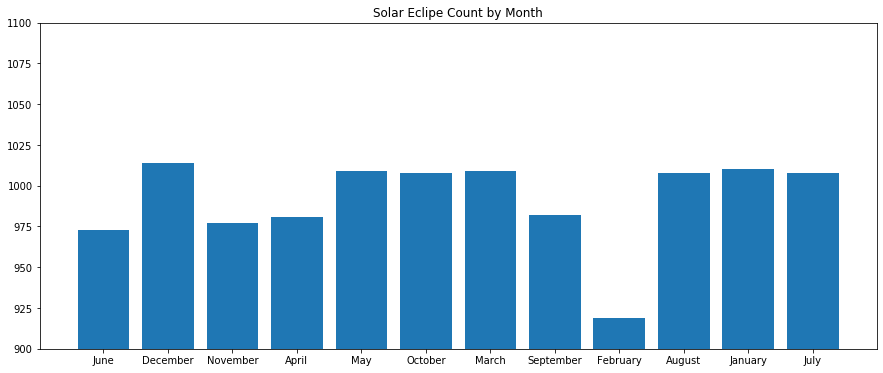

In [190]:
#Plot the counts of solar eclipses for months 
_=plt.figure(figsize=(15,6))
_=plt.bar(solar_months_count.keys(), solar_months_count.values())
_=plt.ylim(900,1100)
_= plt.title('Solar Eclipe Count by Month')
_=plt.show()

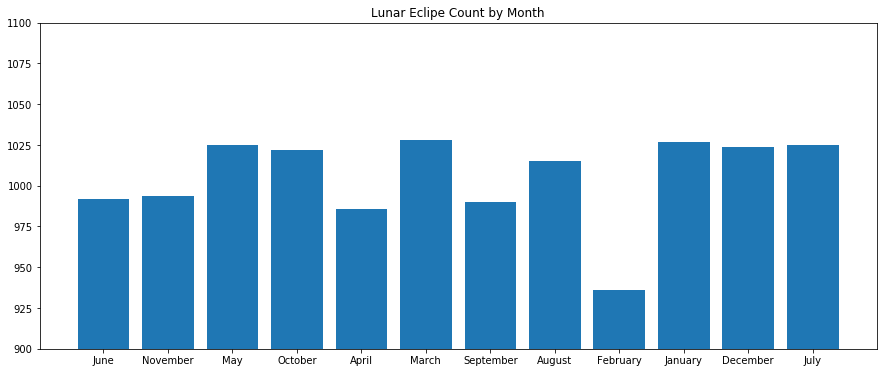

In [191]:
#Plot the counts of lunar eclipses for months 
_=plt.figure(figsize=(15,6))
_=plt.bar(lunar_months_count.keys(), lunar_months_count.values())
_=plt.ylim(900,1100)
_= plt.title('Lunar Eclipe Count by Month')
_=plt.show()

In [192]:
#eclipses less common during Feb, why? less days so less chance of happening in feb?

In [193]:
'''
Can you count something interesting?
Can you find trends (e.g. high, low, increasing, decreasing, anomalies)?
Can you make a bar plot or a histogram?
Can you compare two related quantities?
Can you make a scatterplot?
Can you make a time-series plot?'''

'\nCan you count something interesting?\nCan you find trends (e.g. high, low, increasing, decreasing, anomalies)?\nCan you make a bar plot or a histogram?\nCan you compare two related quantities?\nCan you make a scatterplot?\nCan you make a time-series plot?'

# Can you compare two related quantities?

# Can you make a scatterplot?

# Can you make a time-series plot?

In [194]:
sh


,Calendar Date,Eclipse Time,Delta T (s),Eclipse Type,Eclipse Magnitude,Latitude,Longitude,Sun Altitude,Sun Azimuth,Path Width (km),Central Duration
Catalog Number,,,,,,,,,,,
1,"[-1999, June, 12]",03:14:51,46438,T,1.0733,6.0N,33.3W,74,344,247.0,06m37s
2,"[-1999, December, 5]",23:45:23,46426,A,0.9382,32.9S,10.8E,76,21,236.0,06m44s
3,"[-1998, June, 1]",18:09:16,46415,T,1.0284,46.2N,83.4E,60,151,111.0,02m15s
4,"[-1998, November, 25]",05:57:03,46403,A,0.9806,67.8S,143.8W,25,74,162.0,01m14s
5,"[-1997, April, 22]",13:19:56,46393,P,0.1611,60.6S,106.4W,0,281,NaN,NaN


# Trying to find out which months the total eclipses occur 

In [195]:
#make a empty list of total solar eclipses
solar_type = []

#if the 'Eclipse Type' column has T, then append to the list
for i in solar['Eclipse Type']:
    if i is 'T':
        solar_type.append([i])

#see how many total solar eclipses
print(len(solar_type))

3049


In [196]:
#make an empty list of total eclipses
lunar_type = []

#if the value is not NaN in 'Total Eclipse Duration' then append to the new list
for i in lunar['Total Eclipse Duration (m)']:
    if str(i) != 'nan':
        lunar_type.append([i])

#see how many total lunar eclipses
print(len(lunar_type))

3479


In [197]:
solar_type = solar[['Calendar Date','Eclipse Type']]
lunar_type = lunar[['Calendar Date','Total Eclipse Duration (m)']]

In [198]:
#create df of solar eclipses with total eclipse
total_solar = solar.loc[solar['Eclipse Type'] == 'T']


In [199]:
total_solar

,Calendar Date,Eclipse Time,Delta T (s),Eclipse Type,Eclipse Magnitude,Latitude,Longitude,Sun Altitude,Sun Azimuth,Path Width (km),Central Duration
Catalog Number,,,,,,,,,,,
1,"[-1999, June, 12]",03:14:51,46438,T,1.0733,6.0N,33.3W,74,344,247.0,06m37s
3,"[-1998, June, 1]",18:09:16,46415,T,1.0284,46.2N,83.4E,60,151,111.0,02m15s
10,"[-1996, October, 4]",23:23:37,46358,T,1.0257,28.8N,38.6E,59,214,101.0,02m04s
13,"[-1994, March, 20]",03:59:50,46322,T,1.0333,39.4N,73.3W,36,142,186.0,02m35s
18,"[-1992, January, 29]",02:34:14,46277,T,1.0181,44.1S,13.3W,67,340,67.0,01m30s
21,"[-1991, July, 12]",17:34:12,46242,T,1.0606,10.0N,106.3E,76,6,205.0,05m50s
23,"[-1990, July, 2]",10:30:06,46218,T,1.0609,51.2S,149.5W,15,2,756.0,04m30s
28,"[-1988, November, 4]",17:46:47,46161,T,1.0435,0.6S,106.5E,80,196,148.0,04m04s
30,"[-1987, October, 25]",09:21:08,46138,T,1.0260,48.3N,107.1W,32,207,165.0,01m58s


In [207]:
#create df of lunar eclipses with total eclipse
total_lunar = lunar.dropna(subset=['Total Eclipse Duration (m)'])

In [208]:
total_lunar

,Calendar Date,Eclipse Time,Delta T (s),Eclipse Type,Latitude,Longitude,Penumbral Eclipse Duration (m),Partial Eclipse Duration (m),Total Eclipse Duration (m)
Catalog Number,,,,,,,,,
5,"[-1997, May, 6]",18:57:01,46392,T+,11S,92W,322.8,213.5,98.2
6,"[-1997, October, 31]",06:54:09,46380,T+,9N,88E,374.4,228.7,90.6
15,"[-1993, February, 23]",02:59:48,46300,T-,16N,153E,371.8,228.2,87.7
16,"[-1993, August, 19]",03:45:11,46288,T+,19S,137E,320.2,209.8,93.2
21,"[-1991, December, 22]",15:38:22,46231,T,23N,42W,308.3,193.5,52.6
22,"[-1990, June, 17]",09:59:52,46219,T,22S,40E,360.9,217.8,59.8
23,"[-1990, December, 12]",06:49:16,46207,T-,21N,90E,323.9,206.7,80.9
24,"[-1989, June, 6]",14:31:12,46196,T,19S,28W,338.4,207.0,49.8
31,"[-1986, April, 6]",03:30:53,46127,T+,1N,141E,334.6,218.5,99.9


In [211]:
#extract the columns with data and total eclipse duration
total_lunar = total_lunar[['Calendar Date','Total Eclipse Duration (m)']]

,Calendar Date,Total Eclipse Duration (m)
Catalog Number,,
5,"[-1997, May, 6]",98.2
6,"[-1997, October, 31]",90.6
15,"[-1993, February, 23]",87.7
16,"[-1993, August, 19]",93.2
21,"[-1991, December, 22]",52.6
22,"[-1990, June, 17]",59.8
23,"[-1990, December, 12]",80.9
24,"[-1989, June, 6]",49.8
31,"[-1986, April, 6]",99.9


In [213]:
total_lunar_months = dict(Counter([date[1] for date in total_lunar['Calendar Date']]))

In [214]:
total_lunar_months

{'May': 297,
 'October': 290,
 'February': 260,
 'August': 299,
 'December': 290,
 'June': 294,
 'April': 290,
 'September': 285,
 'January': 296,
 'July': 301,
 'November': 286,
 'March': 291}

In [215]:
total_solar_months = dict(Counter([date[1] for date in total_solar['Calendar Date']]))

In [216]:
total_solar_months

{'June': 295,
 'October': 225,
 'March': 274,
 'January': 220,
 'July': 297,
 'November': 203,
 'February': 216,
 'April': 283,
 'August': 287,
 'December': 213,
 'May': 296,
 'September': 240}

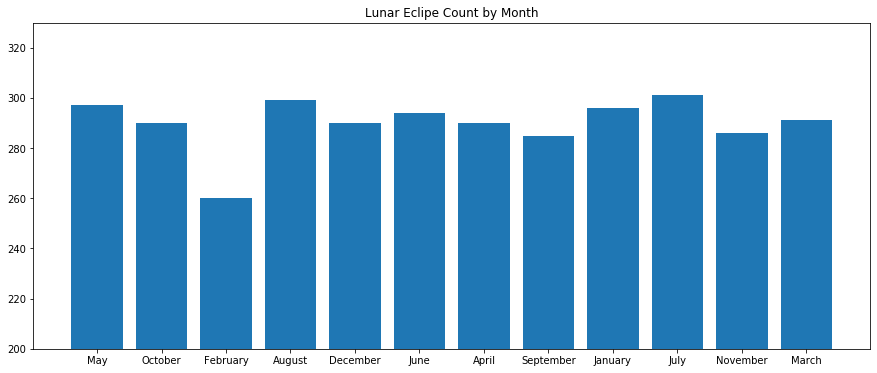

In [223]:
#Plot the counts of lunar eclipses for months 
_=plt.figure(figsize=(15,6))
_=plt.bar(total_lunar_months.keys(), total_lunar_months.values())
_=plt.ylim(200,330)
_= plt.title('Total Lunar Eclipse Count by Month')
_=plt.show()

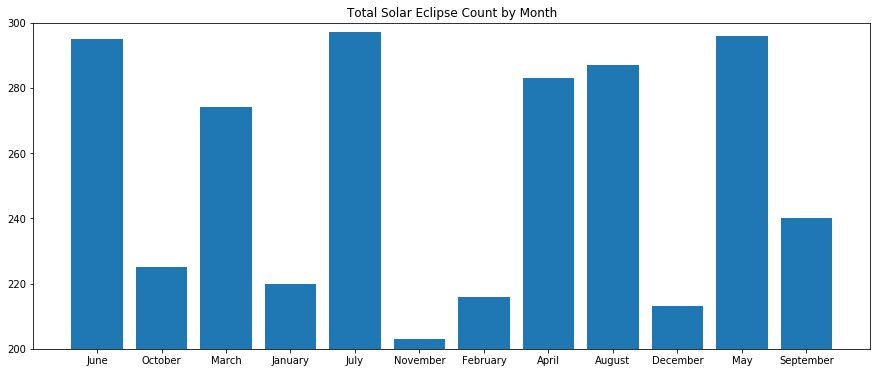

In [226]:
#Plot the counts of lunar eclipses for months 
_=plt.figure(figsize=(15,6))
_=plt.bar(total_solar_months.keys(), total_solar_months.values())
_=plt.ylim(200,300)
_= plt.title('Total Solar Eclipse Count by Month')
_=plt.show()

# organize plots so the months are in order somehow

In [ ]:
#Plot the counts of lunar eclipses for months 
x = total_solar_months.keys()
_=plt.figure(figsize=(15,6))
_=plt.bar(total_solar_months.keys(), total_solar_months.values())
_=plt.ylim(200,300)
_= plt.title('Total Solar Eclipse Count by Month')
_=plt.show()